# Whoop vs Garmin - Sleep Comparison
In this notebook, we compare the sleep data from Whoop and Garmin.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import os

import sys
sys.path.append("..")

import garmin, constants, whoop

# Load Sleep Summaries

In [3]:
g_sleep_summary = garmin.load_sleep_summary(os.path.join("..", "Data", "Garmin"))
w_sleep_summary = whoop.load_sleep_summary(os.path.join("..", "Data", "Whoop"))

Reindex the sleep summaries

In [4]:
date_range = pd.date_range(
    start=max(g_sleep_summary["calendarDate"].min(), w_sleep_summary["calendarDate"].min()),
    end=min(g_sleep_summary["calendarDate"].max(), w_sleep_summary["calendarDate"].max()),
    freq="D",
)

g_sleep_summary = (
    g_sleep_summary.set_index("calendarDate")
    .reindex(date_range)
    .reset_index(names="calendarDate")
)

w_sleep_summary = w_sleep_summary[w_sleep_summary["Riposo breve"] == False]
w_sleep_summary = (
    w_sleep_summary.set_index("calendarDate")
    .reindex(date_range)
    .reset_index(names="calendarDate")
)

In [5]:
g_sleep_summary["Device"] = "Garmin"
w_sleep_summary["Device"] = "Whoop"

In [6]:
sleep_summary = pd.concat((g_sleep_summary, w_sleep_summary), axis=0, ignore_index=True)
sleep_summary[constants.CALENDAR_DATE_COL] = pd.to_datetime(sleep_summary[constants.CALENDAR_DATE_COL])
sleep_summary["durationInDecimalHours"] = sleep_summary[constants.DURATION_IN_MS_COL] / 1000 / 60 / 60

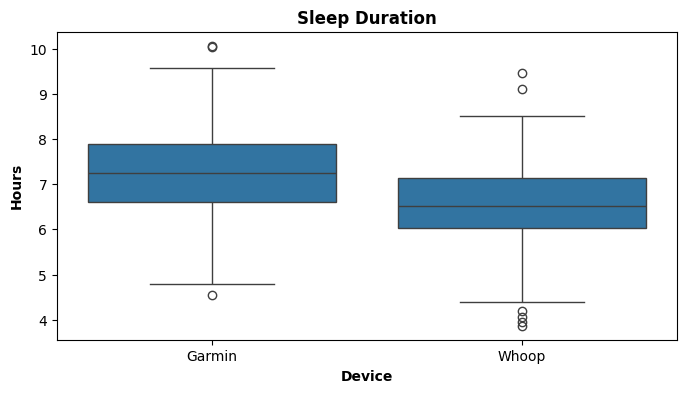

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))
ax = sns.boxplot(data=sleep_summary, y="durationInDecimalHours", x="Device")
ax.set_ylabel("Hours", fontweight="bold")
ax.set_xlabel("Device", fontweight="bold")
ax.set_title("Sleep Duration", fontweight="bold");

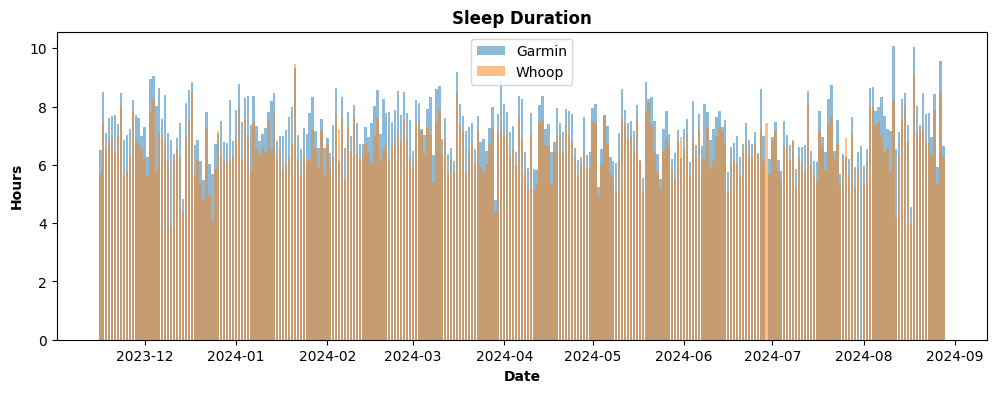

In [8]:
fig, ax = plt.subplots(1,1,figsize=(12,4))
ax.bar(
    g_sleep_summary[constants.CALENDAR_DATE_COL],
    g_sleep_summary[constants.DURATION_IN_MS_COL] / 1000 / 60 / 60,
    alpha=0.5,
    label="Garmin",
    
)
ax.bar(
    w_sleep_summary[constants.CALENDAR_DATE_COL],
    w_sleep_summary[constants.DURATION_IN_MS_COL] / 1000 / 60 / 60,
    alpha=0.5,
    label="Whoop"
)
ax.set_title("Sleep Duration", fontweight="bold")
ax.set_xlabel("Date", fontweight="bold")
ax.set_ylabel("Hours", fontweight="bold")
ax.legend();

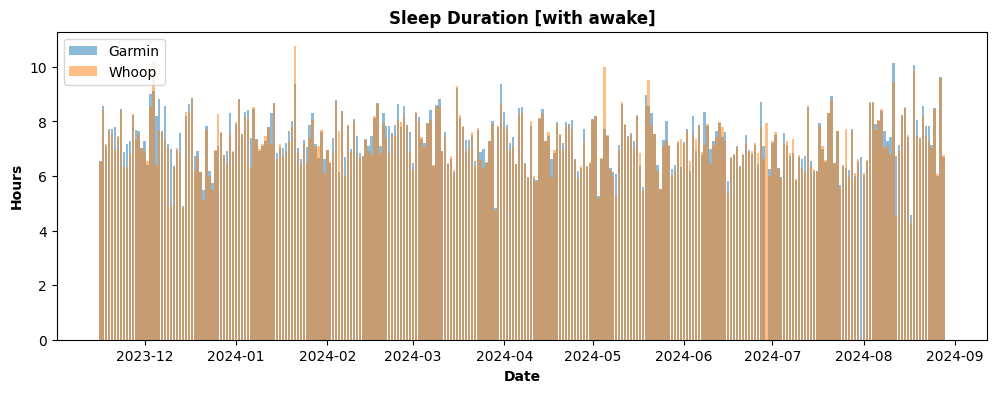

In [9]:
fig, ax = plt.subplots(1,1,figsize=(12,4))
ax.bar(
    g_sleep_summary[constants.CALENDAR_DATE_COL],
    g_sleep_summary[constants.DURATION_IN_MS_COL] / 1000 / 60 / 60
    + g_sleep_summary[constants.AWAKE_DURATION_IN_MS_COL]/1000/60/60,
    alpha=0.5,
    label="Garmin",
    
)
ax.bar(
    w_sleep_summary[constants.CALENDAR_DATE_COL],
    w_sleep_summary[constants.DURATION_IN_MS_COL] / 1000 / 60 / 60 
    + w_sleep_summary[constants.AWAKE_DURATION_IN_MS_COL]/1000/60/60,
    alpha=0.5,
    label="Whoop"
)
ax.set_title("Sleep Duration [with awake]", fontweight="bold")
ax.set_xlabel("Date", fontweight="bold")
ax.set_ylabel("Hours", fontweight="bold")
ax.legend();

In [12]:
def plot_sleep_stage(stage, title):
    fig, ax = plt.subplots(1,1,figsize=(12,4))
    ax.bar(
        w_sleep_summary[constants.CALENDAR_DATE_COL],
        w_sleep_summary[stage]/1000/60/60,
        alpha=0.5,
        label="Whoop",
        color="tab:orange"
    )

    ax.bar(
        g_sleep_summary[constants.CALENDAR_DATE_COL],
        g_sleep_summary[stage] / 1000 / 60 / 60,
        alpha=0.5,
        label="Garmin",
        color="tab:blue"
    )

    ax.set_title(title, fontweight="bold")
    ax.set_xlabel("Date", fontweight="bold")
    ax.set_ylabel("Hours", fontweight="bold")
    ax.legend();

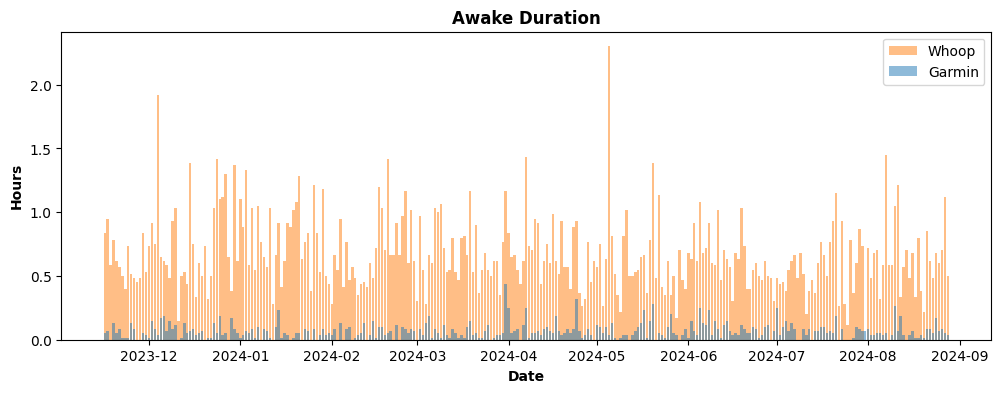

In [17]:
plot_sleep_stage(constants.AWAKE_DURATION_IN_MS_COL, "Awake Duration")

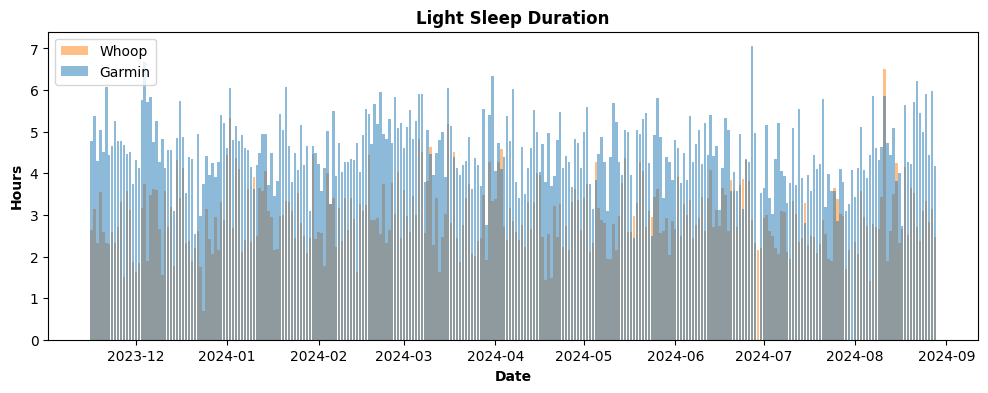

In [18]:
plot_sleep_stage(constants.LIGHT_SLEEP_DURATION_IN_MS_COL, "Light Sleep Duration")

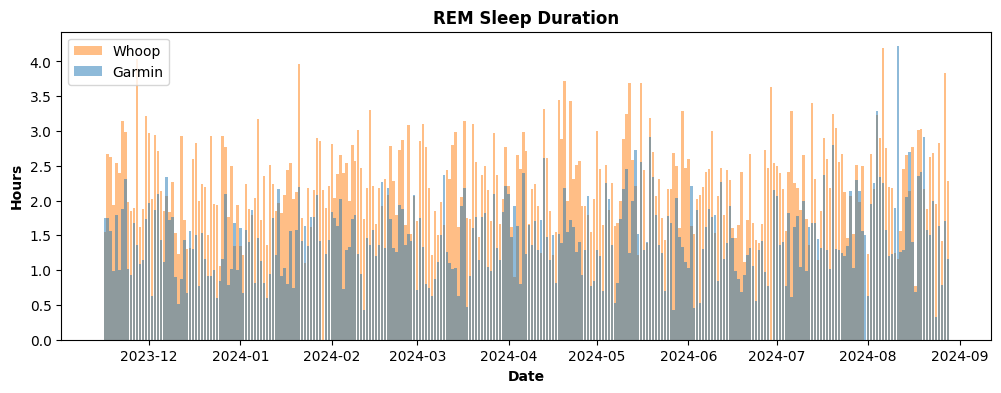

In [16]:
fig, ax = plt.subplots(1,1,figsize=(12,4))

ax.bar(
    w_sleep_summary[constants.CALENDAR_DATE_COL],
    + w_sleep_summary[constants.REM_SLEEP_DURATION_IN_MS_COL]/1000/60/60,
    alpha=0.5,
    label="Whoop",
    color="tab:orange"
)

ax.bar(
    g_sleep_summary[constants.CALENDAR_DATE_COL],
    g_sleep_summary[constants.REM_SLEEP_DURATION_IN_MS_COL] / 1000 / 60 / 60,
    alpha=0.5,
    label="Garmin",
    color="tab:blue"
)

ax.set_title("REM Sleep Duration", fontweight="bold")
ax.set_xlabel("Date", fontweight="bold")
ax.set_ylabel("Hours", fontweight="bold")
ax.legend();

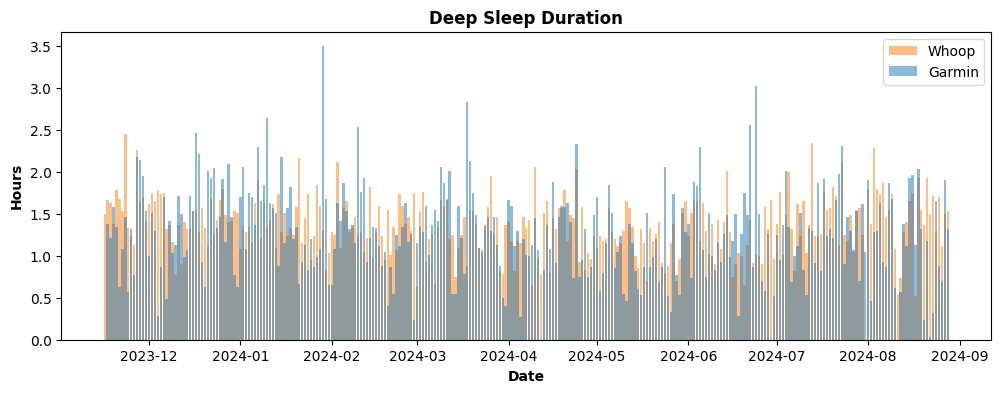

In [19]:
plot_sleep_stage(constants.DEEP_SLEEP_DURATION_IN_MS_COL, "Deep Sleep Duration")

# Average Stage Duration Analysis
Let's compute the average duration of sleep stages.

In [20]:
average_stage_duration_df = pd.DataFrame()

In [21]:
w_sleep_summary["totDur"] = w_sleep_summary[constants.AWAKE_DURATION_IN_MS_COL] + w_sleep_summary[constants.DURATION_IN_MS_COL]
g_sleep_summary["totDur"] = g_sleep_summary[constants.AWAKE_DURATION_IN_MS_COL] + g_sleep_summary[constants.DURATION_IN_MS_COL]
w_average_durations = pd.DataFrame({
    "device": ["Whoop","Whoop","Whoop","Whoop"],
    "stage":["awake","light","REM","deep"],
    "mean":[w_sleep_summary[constants.AWAKE_DURATION_IN_MS_COL].mean()/1000/60/60,
             w_sleep_summary[constants.LIGHT_SLEEP_DURATION_IN_MS_COL].mean()/1000/60/60,
             w_sleep_summary[constants.REM_SLEEP_DURATION_IN_MS_COL].mean()/1000/60/60,
             w_sleep_summary[constants.DEEP_SLEEP_DURATION_IN_MS_COL].mean()/1000/60/60],
    "std":[w_sleep_summary[constants.AWAKE_DURATION_IN_MS_COL].std()/1000/60/60,
             w_sleep_summary[constants.LIGHT_SLEEP_DURATION_IN_MS_COL].std()/1000/60/60,
             w_sleep_summary[constants.REM_SLEEP_DURATION_IN_MS_COL].std()/1000/60/60,
             w_sleep_summary[constants.DEEP_SLEEP_DURATION_IN_MS_COL].std()/1000/60/60],
    "mean%": [(w_sleep_summary[constants.AWAKE_DURATION_IN_MS_COL]/(w_sleep_summary["totDur"])).mean(),
             (w_sleep_summary[constants.LIGHT_SLEEP_DURATION_IN_MS_COL]/(w_sleep_summary["totDur"])).mean(),
             (w_sleep_summary[constants.REM_SLEEP_DURATION_IN_MS_COL]/(w_sleep_summary["totDur"])).mean(),
             (w_sleep_summary[constants.DEEP_SLEEP_DURATION_IN_MS_COL]/(w_sleep_summary["totDur"])).mean(),
    ],
    "std%": [(w_sleep_summary[constants.AWAKE_DURATION_IN_MS_COL]/(w_sleep_summary["totDur"])).std(),
             (w_sleep_summary[constants.LIGHT_SLEEP_DURATION_IN_MS_COL]/(w_sleep_summary["totDur"])).std(),
             (w_sleep_summary[constants.REM_SLEEP_DURATION_IN_MS_COL]/(w_sleep_summary["totDur"])).std(),
             (w_sleep_summary[constants.DEEP_SLEEP_DURATION_IN_MS_COL]/(w_sleep_summary["totDur"])).std(),
    ]
})
    
g_average_durations = pd.DataFrame({
    "device": ["Garmin","Garmin","Garmin","Garmin"],
    "stage":["awake","light","REM","deep"],
    "mean":[g_sleep_summary[constants.AWAKE_DURATION_IN_MS_COL].mean()/1000/60/60,
             g_sleep_summary[constants.LIGHT_SLEEP_DURATION_IN_MS_COL].mean()/1000/60/60,
             g_sleep_summary[constants.REM_SLEEP_DURATION_IN_MS_COL].mean()/1000/60/60,
             g_sleep_summary[constants.DEEP_SLEEP_DURATION_IN_MS_COL].mean()/1000/60/60],
    "std":[g_sleep_summary[constants.AWAKE_DURATION_IN_MS_COL].std()/1000/60/60,
             g_sleep_summary[constants.LIGHT_SLEEP_DURATION_IN_MS_COL].std()/1000/60/60,
             g_sleep_summary[constants.REM_SLEEP_DURATION_IN_MS_COL].std()/1000/60/60,
             g_sleep_summary[constants.DEEP_SLEEP_DURATION_IN_MS_COL].std()/1000/60/60],
             "mean%": [(g_sleep_summary[constants.AWAKE_DURATION_IN_MS_COL]/(g_sleep_summary["totDur"])).mean(),
             (g_sleep_summary[constants.LIGHT_SLEEP_DURATION_IN_MS_COL]/(g_sleep_summary["totDur"])).mean(),
             (g_sleep_summary[constants.REM_SLEEP_DURATION_IN_MS_COL]/(g_sleep_summary["totDur"])).mean(),
             (g_sleep_summary[constants.DEEP_SLEEP_DURATION_IN_MS_COL]/(g_sleep_summary["totDur"])).mean(),
    ],
    "std%": [(g_sleep_summary[constants.AWAKE_DURATION_IN_MS_COL]/(g_sleep_summary["totDur"])).std(),
             (g_sleep_summary[constants.LIGHT_SLEEP_DURATION_IN_MS_COL]/(g_sleep_summary["totDur"])).std(),
             (g_sleep_summary[constants.REM_SLEEP_DURATION_IN_MS_COL]/(g_sleep_summary["totDur"])).std(),
             (g_sleep_summary[constants.DEEP_SLEEP_DURATION_IN_MS_COL]/(g_sleep_summary["totDur"])).std(),
    ]
})
    

In [22]:
average_stage_duration_df = pd.concat((w_average_durations, g_average_durations))

In [23]:
average_stage_duration_df = average_stage_duration_df.set_index(["device", "stage"])

## Plot Average Sleep Stage Durations

(0.0, 8.0)

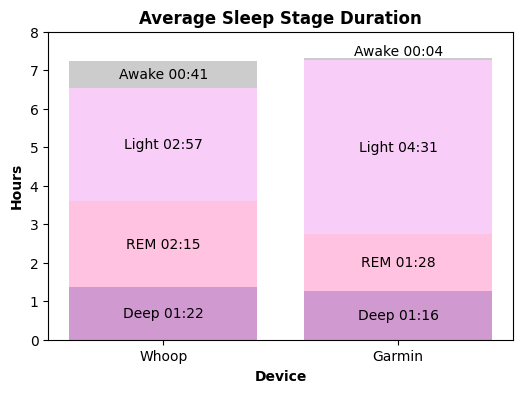

In [24]:
alpha= 0.4
rem_color = "hotpink"
deep_color = "darkmagenta"
light_color = "violet"
awake_color = "grey"

fig, ax = plt.subplots(1,1,figsize=(6,4))

for device_idx, device in enumerate(["Whoop", "Garmin"]):
        bottom = 0
        # Get durations
        deep = average_stage_duration_df.loc[device, "deep"].iloc[0]
        rem = average_stage_duration_df.loc[device, "REM"].iloc[0]
        light = average_stage_duration_df.loc[device, "light"].iloc[0]
        awake = average_stage_duration_df.loc[device, "awake"].iloc[0]

        deep_hours, deep_minutes = divmod(deep*60, 60)
        rem_hours, rem_minutes = divmod(rem*60, 60)
        light_hours, light_minutes = divmod(light*60, 60)
        awake_hours, awake_minutes = divmod(awake*60, 60)

        # Plot deep
        ax.bar(height=deep, 
                x=[device_idx], 
                color=deep_color, 
                alpha=alpha)
        bottom = deep
        ax.text(device_idx, 
                deep/2,
                f"Deep {deep_hours:02.0f}:{deep_minutes:02.0f}", 
                ha="center",
                va="center")
        
        # Plot REM
        ax.bar(height=rem, bottom=bottom, x=[device_idx], color=rem_color, alpha=alpha)
        bottom += rem
        ax.text(device_idx, 
                (deep)+rem/2,
                f"REM {rem_hours:02.0f}:{rem_minutes:02.0f}", 
                ha="center",
                va="center")
        
        # Plot light
        ax.bar(height=light, 
                bottom=bottom, 
                x=[device_idx], 
                color=light_color, 
                alpha=alpha)
        bottom += light
        ax.text(device_idx, 
                (deep+rem)+light/2,
                f"Light {light_hours:02.0f}:{light_minutes:02.0f}", 
                ha="center",
                va="center")
        
        # Plot awake
        ax.bar(height=awake, 
                bottom=bottom, 
                x=[device_idx], 
                color=awake_color, 
                alpha=alpha)
        height = (deep+rem+light)+awake/2
        if device == "Garmin":
                height += 0.2
        ax.text(device_idx, 
                height,
                f"Awake {awake_hours:02.0f}:{awake_minutes:02.0f}", 
                ha="center",
                va="center")
        
ax.set_xticks([0,1], ["Whoop", "Garmin"])
ax.tick_params(axis="x")
ax.set_ylabel("Hours", fontweight="bold")
ax.set_title("Average Sleep Stage Duration", fontweight="bold")
ax.set_xlabel("Device", fontweight="bold");
ax.set_ylim([0,8])
# -> Image as tick label?


In [21]:
average_stage_duration_df

mean       std     mean%      std%
device stage                                        
Whoop  awake  0.678963  0.292767  0.093091  0.035485
       light  2.941725  0.773497  0.407529  0.093095
       REM    2.243765  0.619016  0.310248  0.073004
       deep   1.364452  0.336460  0.189133  0.041476
Garmin awake  0.068007  0.062119  0.009157  0.008028
       light  4.518939  0.797454  0.613683  0.074549
       REM    1.462296  0.564995  0.197191  0.067357
       deep   1.271620  0.541064  0.175105  0.076922

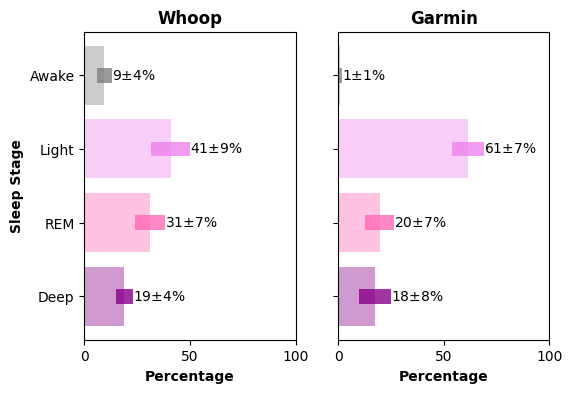

In [26]:
alpha= 0.4
color_map = {
       "deep": deep_color,
       "REM": rem_color,
       "light": light_color,
       "awake": awake_color,
}

fig, ax = plt.subplots(1,2,figsize=(6,4), sharex=True, sharey=True)
y_idx = 0
for device_idx, device in enumerate(["Whoop", "Garmin"]):
    y_idx = 0
    for stage_idx, stage in enumerate(["deep", "REM", "light","awake"]):   
        # Get durations
        stage_mean = average_stage_duration_df.loc[device, stage]["mean%"]
        stage_std = average_stage_duration_df.loc[device, stage]["std%"]

        stage_hours, stage_minutes = divmod(deep*60, 60)
        ax[device_idx].barh(width=stage_mean, 
                y=y_idx, 
                color=color_map[stage], 
                alpha=0.4)

        ax[device_idx].barh(width=stage_std*2,
                left=stage_mean-stage_std,
                height=0.2,
                y=y_idx, 
                color=color_map[stage], 
                alpha=0.8)
        #bottom = deep
        y_idx += 1
        ax[device_idx].text(stage_mean+stage_std, 
              stage_idx,
              f"{stage_mean*100:.0f}$\\pm${stage_std*100:.0f}%", 
              ha="left",
              va="center")

        ax[device_idx].set_xlabel("Percentage", fontweight="bold")
    #ax.tick_params(axis="x")
    ax[device_idx].set_title(device, fontweight="bold")
ax[0].set_ylabel("Sleep Stage", fontweight="bold")
ax[0].set_yticks([0,1,2,3],["Deep","REM","Light", "Awake"]);
ax[0].set_xlim([0,1])
ax[0].set_xticks([0,0.5,1.0],[0,50,100]);
    #ax[device_idx]set_title("Sleep Stages", fontweight="bold")
    #ax.set_xlabel("Device", fontweight="bold");

# Bedtime and Wake-Up Time Analysis

## Bedtime

In [40]:
abs((g_sleep_summary[constants.ISODATE_COL] - 
    w_sleep_summary[constants.ISODATE_COL]).dt.total_seconds()
/ 60).describe()

count    285.000000
mean      11.750117
std       17.802243
min        0.033333
25%        4.500000
50%        6.650000
75%        9.816667
max      128.550000
Name: isoDate, dtype: float64

## Wake-up Time

In [41]:
g_sleep_summary["wakeup"] = g_sleep_summary[constants.ISODATE_COL] + pd.to_timedelta(g_sleep_summary[constants.DURATION_IN_MS_COL] + 
                                                                                     g_sleep_summary[constants.AWAKE_DURATION_IN_MS_COL], 
                                                                                     unit="ms")

w_sleep_summary["wakeup"] = w_sleep_summary[constants.ISODATE_COL] + pd.to_timedelta(w_sleep_summary[constants.DURATION_IN_MS_COL] + 
                                                                                     w_sleep_summary[constants.AWAKE_DURATION_IN_MS_COL], 
                                                                                     unit="ms")

In [42]:
(abs(g_sleep_summary["wakeup"] - 
    w_sleep_summary["wakeup"]).dt.total_seconds()
/ 60).describe()

count    285.000000
mean       9.979006
std       13.830854
min        0.100000
25%        2.600000
50%        5.333333
75%       10.800000
max      129.450000
Name: wakeup, dtype: float64

(-2.5, 2.5)

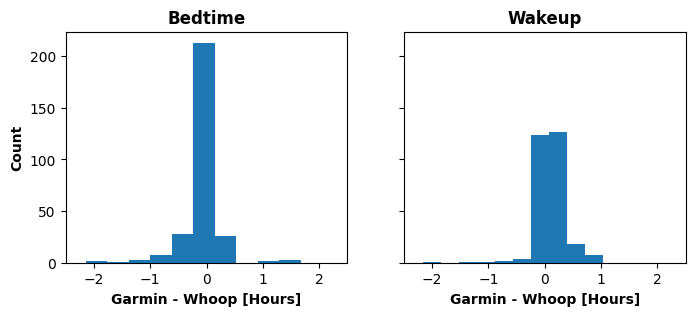

In [38]:
fig, ax = plt.subplots(1,2, figsize=(8,3), sharey=True, sharex=True)

ax1 = ((g_sleep_summary[constants.ISODATE_COL] - 
    w_sleep_summary[constants.ISODATE_COL]).dt.total_seconds()
/ 60 / 60).hist(grid=False, ax=ax[0])


ax2 = ((g_sleep_summary["wakeup"] - 
    w_sleep_summary["wakeup"]).dt.total_seconds()
/ 60 / 60).hist(grid=False, ax=ax[1])
ax1.set_xlabel("Garmin - Whoop [Hours]", fontweight="bold")
ax2.set_xlabel("Garmin - Whoop [Hours]", fontweight="bold")
ax1.set_ylabel("Count", fontweight="bold")
ax1.set_title("Bedtime", fontweight="bold")
ax2.set_title("Wakeup", fontweight="bold")
ax1.set_xlim([-2.5,2.5])